# Polynomial Variable Regression
* 다항 회귀는 비선형 데이터를 선형 모델로 학습할 수 있다.
* 각 특성(변수)의 제곱한 새로운 특성을 추가하고 선형 모델로 학습한다.
* 2차식을 포함한 데이터를 생성해서 실험한다.
* [np.polyval(p, x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyval.html): 함수는 x에 대해서 다항식 계수를 갖는 p의 y값을 생성한다.
    * p는 원소의 갯수에 따라 0차, 1차, 2차식의 계수를 나타낸다.
    * p = np.array([2,3,5]) : $2x^2 + 3x + 5$

(100, 1) (100, 1) [-2.54670942] [9.51815782]


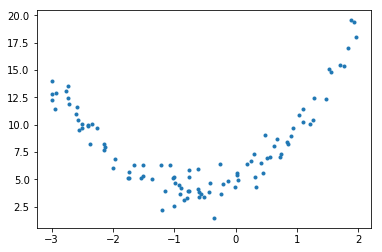

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

m = 100
X = 5 * np.random.rand(m, 1) -3
y = 2*X**2 + 3*X + 5 + np.random.randn(m, 1) # 2,3,5 +noiseb
print(X.shape, y.shape, X[0], y[0])
plt.plot(X, y, '.')
#xl = np.linspace(-3, 2, m)
#yl = np.polyval([2,3,5], xl)
#plt.plot(xl, yl, 'r-')

### 다항식을 다변수식으로 변환
* X에 제곱을 한 새로운 항을 추가하고 bias에 해당하는 1항을 추가
    * 차수를 높인 항을 추가
* 추가한 항의 값을 모두 더해서 표시하면 선형 형태를 띈다. 
* 이 모델을 다변수 회귀 모델 훈련에 사용한 방법을 그대로 적용
* 다차항을 계속 추가 하면 과유연한 또는 과적합되는 모델을 얻을 수 있다.

(100, 3) [ 1.18122508 -1.08684179  1.        ]
[[2.1055561 ]
 [2.07108402]]


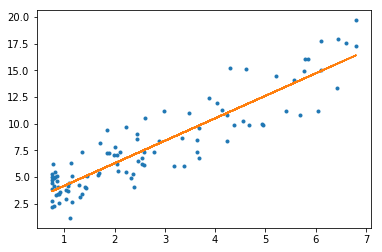

In [2]:
degree = 3 # can change the degree higher
#X_poly = np.concatenate( (X**2, X, np.ones((m,1))),axis= 1)  # same with the code below 
X_poly = np.vander(X.ravel(), degree)
print(X_poly.shape, X_poly[0])
plt.plot(X_poly.sum(axis=1), y, '.')
p1 = np.polyfit(X_poly.sum(axis=1), y,1)
print(p1)
plt.plot(X_poly.sum(axis=1), np.polyval(p1, X_poly.sum(axis=1)))


initial W [0.60845542 0.53783935 0.25720853]
epoch: 0  cost: 52.511974814870186
epoch: 1000  cost: 5.066634379279726
epoch: 2000  cost: 2.6229307530419392
epoch: 3000  cost: 1.9053445465437349
epoch: 4000  cost: 1.609440077091469
epoch: 5000  cost: 1.480039260734031
epoch: 6000  cost: 1.422996041231191
epoch: 7000  cost: 1.3978234174935573
epoch: 8000  cost: 1.38671345133533
epoch: 9000  cost: 1.3818099669235173
epoch: 10000  cost: 1.3796457644838187
epoch: 11000  cost: 1.3786905715548894
epoch: 12000  cost: 1.3782689873484817
epoch: 13000  cost: 1.3780829168294892
epoch: 14000  cost: 1.37800079269501
epoch: 15000  cost: 1.3779645463648484
epoch: 16000  cost: 1.3779485486747842
epoch: 17000  cost: 1.3779414879299794
epoch: 18000  cost: 1.3779383715977462
epoch: 19000  cost: 1.3779369961725112
epoch: 20000  cost: 1.3779363891144574
epoch: 21000  cost: 1.3779361211831513
epoch: 22000  cost: 1.377936002928918
epoch: 23000  cost: 1.3779359507361977
epoch: 24000  cost: 1.3779359277004044
ep

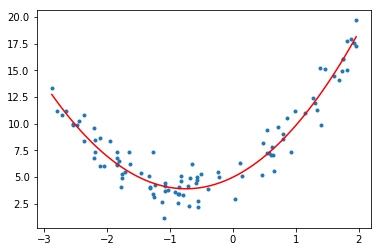

In [3]:
W = np.random.rand(degree,1)
print('initial W', W.ravel())

learning_rate = 5e-4#0.0005
epochs = 30000
for epoch in range(epochs):
    hypothesis = X_poly.dot(W)
    loss = hypothesis - y
    cost = 1/m * np.sum(loss**2)
    gradient = 2/m * X_poly.T.dot(loss)
    W = W - learning_rate * gradient
    if epoch %1000 == 0:
        print('epoch:',epoch,' cost:',cost)
print('Final W:',W.ravel(), 'cost:%f'%cost, 'gradient:', gradient.ravel())

plt.plot(X, y, '.')
xl = np.linspace(X.min(), X.max(), m)
yl = np.polyval(W.ravel(), xl)
plt.plot(xl, yl, 'r-')


## scikit-learn 구현


[-2.54670942] [-2.54670942  6.48572887]
[5.10380166] [[2.90370889 1.94937823]]


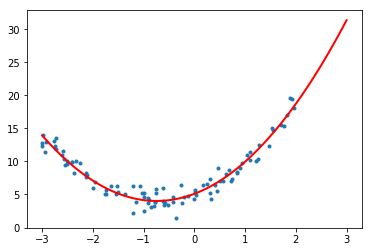

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.plot(X, y, '.')

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_features.fit_transform(X)
print(X[0], X_poly2[0])

lin_reg = LinearRegression()
lin_reg.fit(X_poly2, y)
print(lin_reg.intercept_, lin_reg.coef_)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.show()